In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets
import pandas as pd
from sklearn.tree import plot_tree, export_text
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

##  DecisionTreeClassifier

In [2]:
data = pd.read_csv('../rgr/neo_task_new2.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
y = data['hazardous']
X = data.drop(['hazardous'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
data = pd.read_csv('../data/neo_task_new2.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
num_0 = len(data[data['hazardous']==0])
num_1 = len(data[data['hazardous']==1])
undersampled_data = pd.concat([ data[data['hazardous']==0].sample(num_1) , data[data['hazardous']==1] ])
y = undersampled_data['hazardous']
X = undersampled_data.drop(['hazardous'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_cart_class = undersampled_data['hazardous'].values
X_cart_class = undersampled_data.drop(['hazardous'], axis=1).values
X_train_cart_class, X_test_cart_class, y_train_cart_class, y_test_cart_class = train_test_split(X_cart_class, y_cart_class, test_size=0.2)

In [28]:
grid_space = {
  'criterion': ["gini", "entropy"], #измерение качества разбиения. 'gini' - неодородность,'entropy' - прирост информаци
  'max_depth': np.arange(1, X_train.shape[1], 1),
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=grid_space, cv=3)

In [29]:
model_grid = grid.fit(X_train,y_train)

In [30]:
model_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [31]:
tree_class = model_grid.best_estimator_
text_representation = tree.export_text(tree_class)
print(text_representation)

|--- feature_1 <= 0.10
|   |--- feature_5 <= 22.15
|   |   |--- feature_0 <= 3200235.50
|   |   |   |--- feature_0 <= 2777286.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  2777286.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  3200235.50
|   |   |   |--- feature_0 <= 3641021.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3641021.50
|   |   |   |   |--- feature_0 <= 3724206.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  3724206.00
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  22.15
|   |   |--- feature_0 <= 3063423.50
|   |   |   |--- feature_0 <= 3058715.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3058715.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  3063423.50
|   |   |   |--- feature_0 <= 3180168.50
|   |   |   |   |--- feature_0 <= 3180150.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  3180150.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- fea

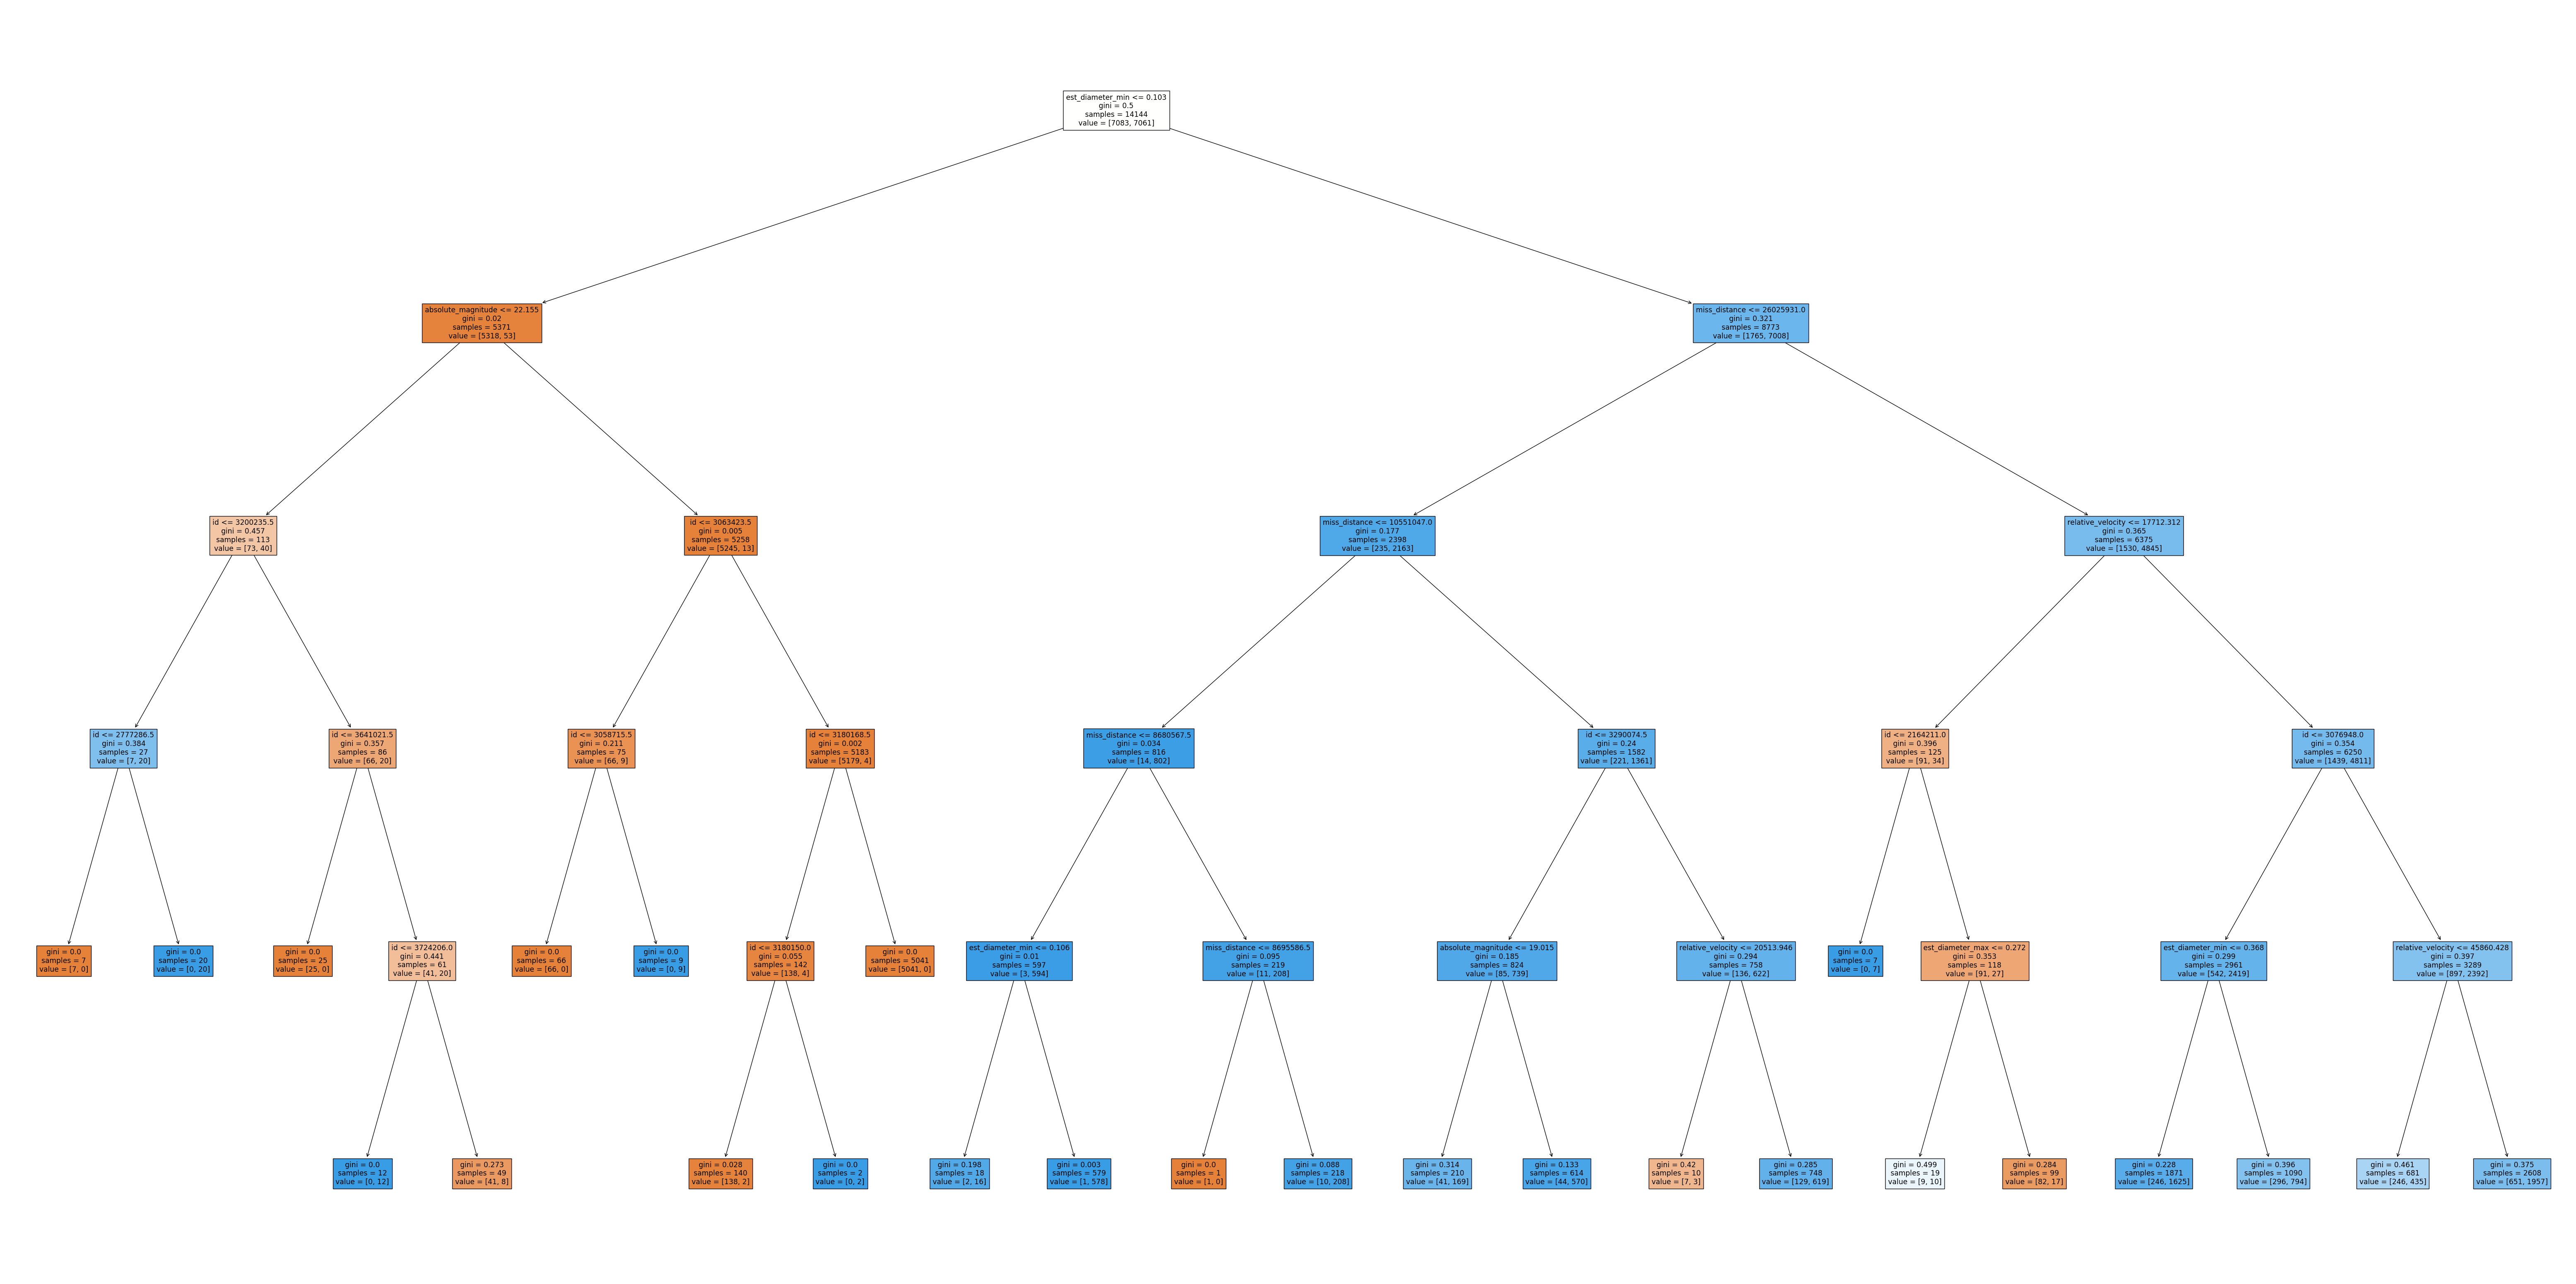

In [32]:
plt.figure(figsize =(80,40))
plot_tree(tree_class, feature_names=X_train.columns, filled=True);

In [33]:
pred_train = tree_class.predict(X_train)
pred_test = tree_class.predict(X_test)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

0.12054581447963801
0.12330316742081449
0.8766968325791855


## DecisionTreeRegressor

In [72]:
data = pd.read_csv('../data/energy_task_new2.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
y = data['Appliances']
X = data.drop(['Appliances'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_cart = data['Appliances'].values
X_cart = data.drop(['Appliances'], axis=1).values
X_train_cart, X_test_cart, y_train_cart, y_test_cart = train_test_split(X_cart, y_cart, test_size=0.2)

In [39]:
grid_space = {
  'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],#Функция измерения качества разделения
  'max_depth': np.arange(1, 10, 1)
}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=grid_space, cv=3)

In [40]:
model_grid = grid.fit(X_train, y_train)

In [41]:
model_grid.best_params_

{'criterion': 'poisson', 'max_depth': 7}

In [42]:
tree_reg = model_grid.best_estimator_

text_representation = tree.export_text(tree_reg)
print(text_representation)

|--- feature_5 <= 5.00
|   |--- feature_26 <= 79.76
|   |   |--- feature_10 <= 23.52
|   |   |   |--- feature_19 <= 27.48
|   |   |   |   |--- feature_16 <= 4.69
|   |   |   |   |   |--- feature_12 <= 19.72
|   |   |   |   |   |   |--- feature_28 <= 23.33
|   |   |   |   |   |   |   |--- value: [67.27]
|   |   |   |   |   |   |--- feature_28 >  23.33
|   |   |   |   |   |   |   |--- value: [99.47]
|   |   |   |   |   |--- feature_12 >  19.72
|   |   |   |   |   |   |--- feature_6 <= 22.58
|   |   |   |   |   |   |   |--- value: [52.69]
|   |   |   |   |   |   |--- feature_6 >  22.58
|   |   |   |   |   |   |   |--- value: [93.33]
|   |   |   |   |--- feature_16 >  4.69
|   |   |   |   |   |--- feature_29 <= -0.18
|   |   |   |   |   |   |--- feature_22 <= 19.72
|   |   |   |   |   |   |   |--- value: [282.94]
|   |   |   |   |   |   |--- feature_22 >  19.72
|   |   |   |   |   |   |   |--- value: [96.80]
|   |   |   |   |   |--- feature_29 >  -0.18
|   |   |   |   |   |   |--- feature_

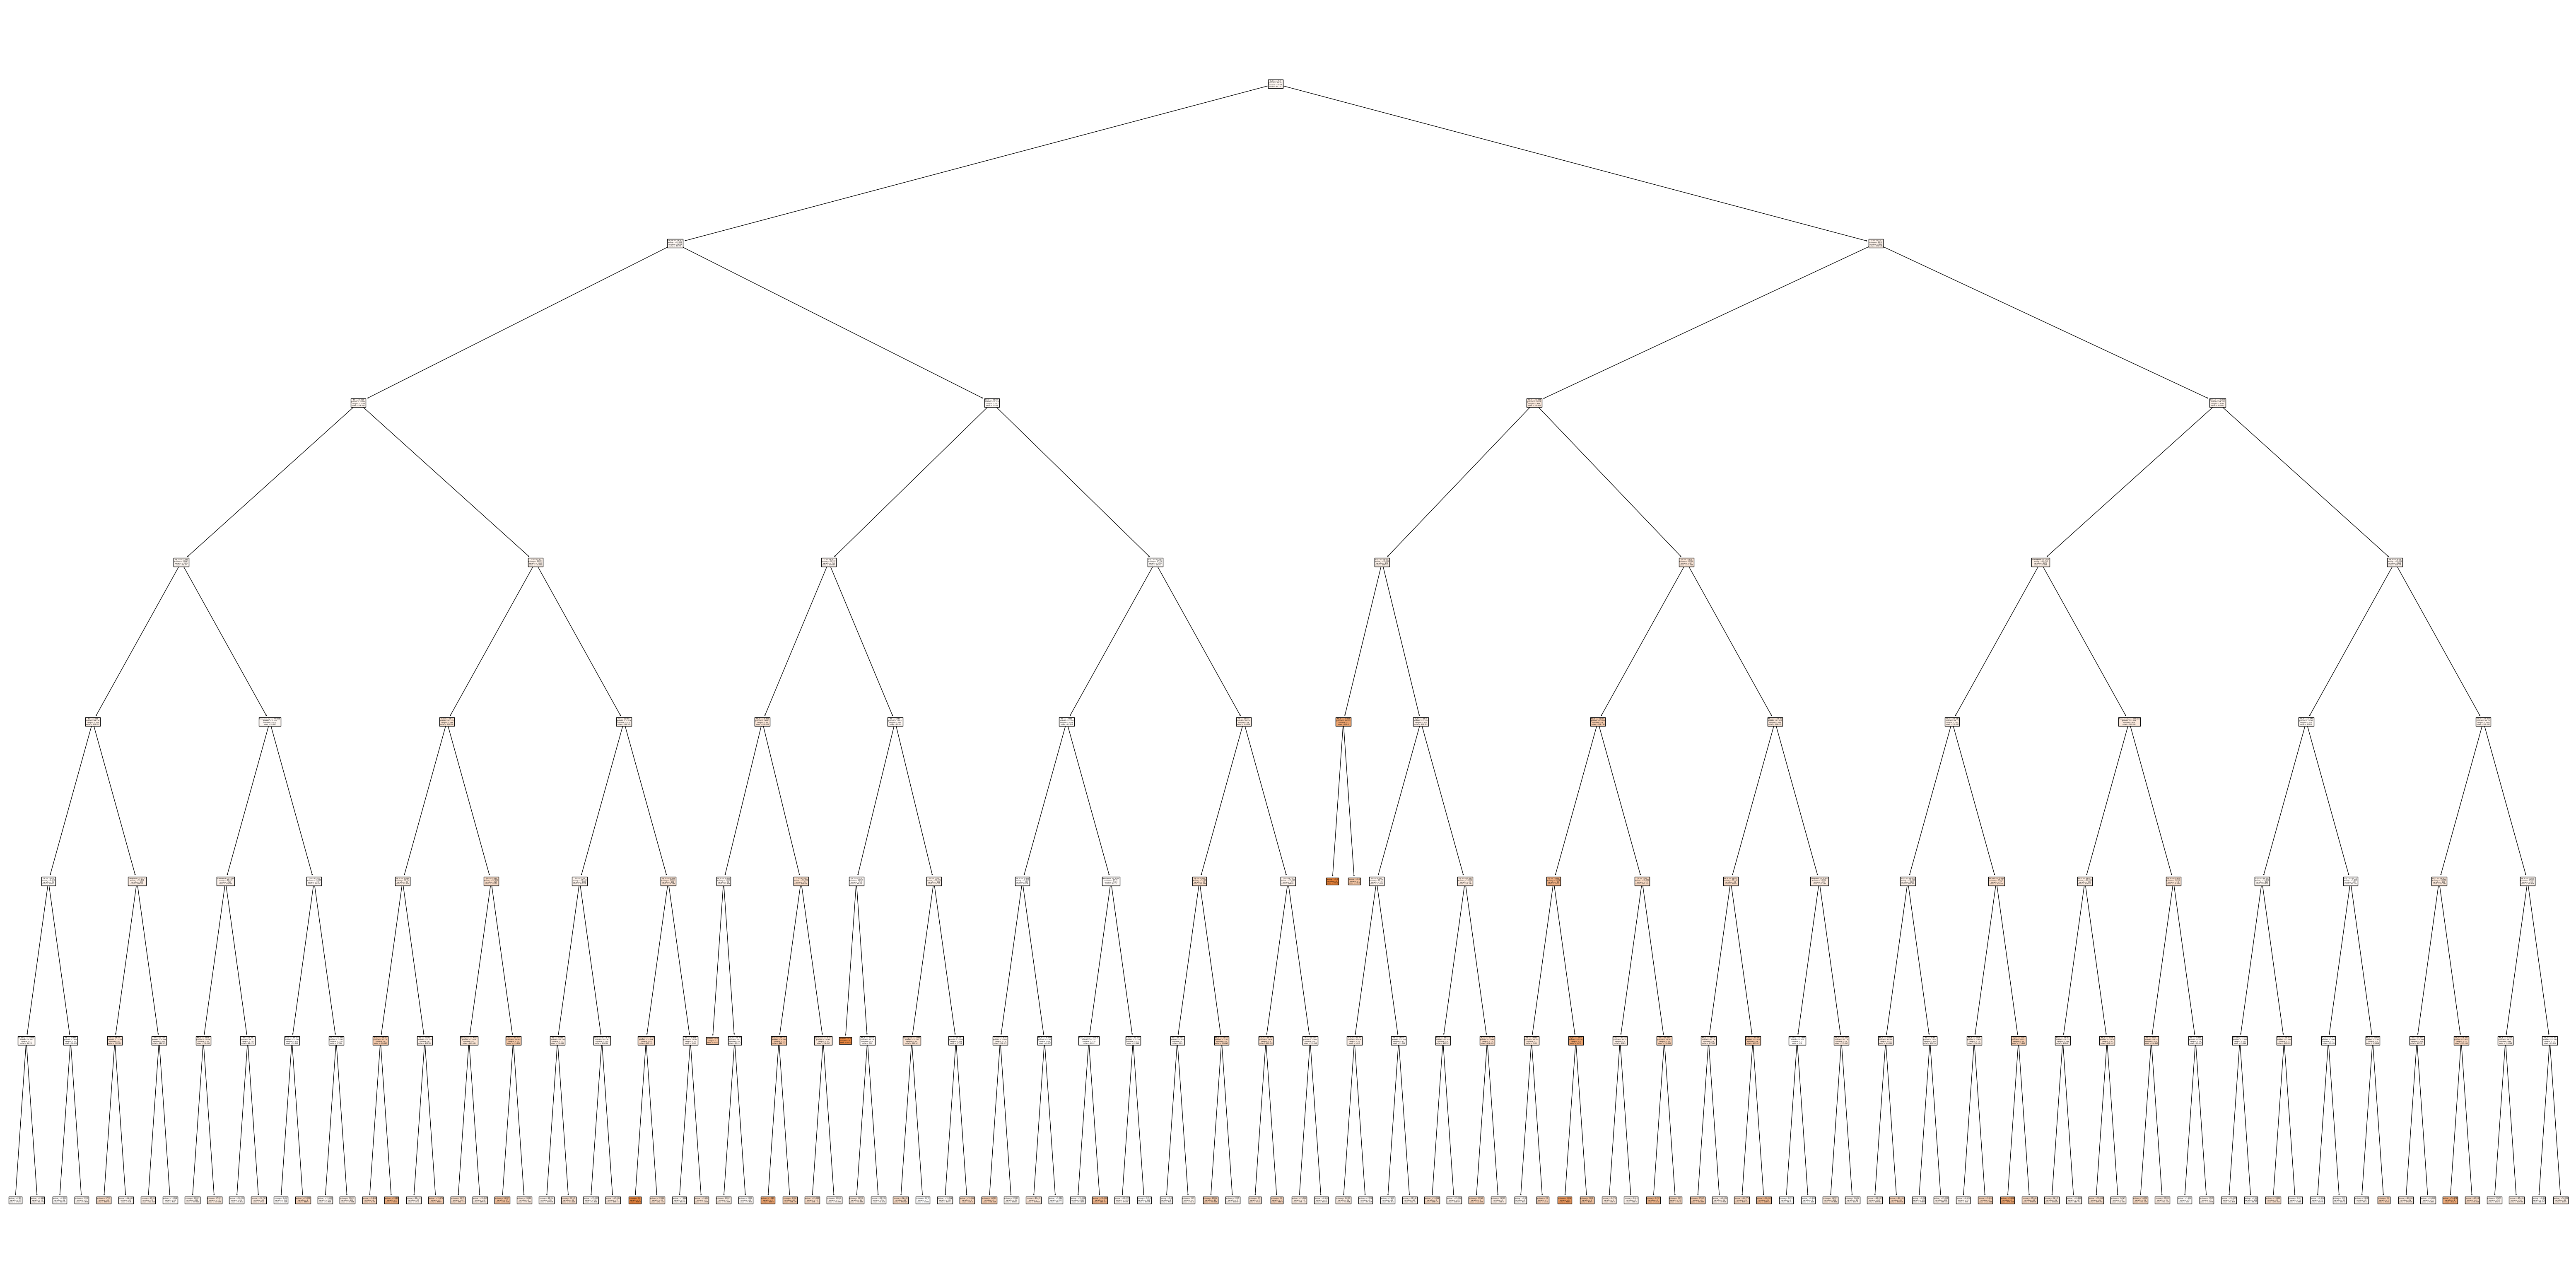

In [43]:
plt.figure(figsize =(80,40))
plot_tree(tree_reg, feature_names=X_train.columns, filled=True);

In [44]:
pred_train = tree_reg.predict(X_train)
pred_test = tree_reg.predict(X_test)

print(tree_reg.score(X_train, y_train))
print(tree_reg.score(X_test, y_test))

0.3404678677783768
0.17729903103252542


In [4]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor

## BaggingClassifier

In [13]:
grid_space = { 
  'n_estimators': np.arange(1, 100, 10),
  'max_samples': np.arange(0.6, 1, 0.1)
}

grid = RandomizedSearchCV(BaggingClassifier(), grid_space, cv=3)

In [14]:
model_grid = grid.fit(X_train, y_train)

In [15]:
model_grid.best_params_

{'n_estimators': 71, 'max_samples': 0.8999999999999999}

In [16]:
from sklearn.metrics import classification_report

In [17]:
from sklearn.metrics import classification_report
bag_model = model_grid.best_estimator_

pred_train = bag_model.predict(X_train)
pred_test = bag_model.predict(X_test)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
print("classification report:\n", classification_report(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

9.632850773380304e-05
0.05228974020255394
classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     16380
           1       0.84      0.58      0.68      1788

    accuracy                           0.95     18168
   macro avg       0.90      0.78      0.83     18168
weighted avg       0.94      0.95      0.94     18168

0.947710259797446


In [18]:
import pickle

In [19]:
pickle.dump(bag_model, open('../rgr/BaggingClassifier.sav', 'wb'))

## BaggingRegressor

In [46]:
grid_space = {
  'n_estimators': np.arange(50, 150, 10),
  'max_samples': np.arange(0.6, 1, 0.1)
}

grid = RandomizedSearchCV(BaggingRegressor(), grid_space, cv=3)


In [47]:
model_grid = grid.fit(X_train, y_train)

In [48]:
model_grid.best_params_

{'n_estimators': 130, 'max_samples': 0.8999999999999999}

In [49]:
bag_model = model_grid.best_estimator_

pred_train = bag_model.predict(X_train)
pred_test = bag_model.predict(X_test)

print(bag_model.score(X_train, y_train))
print(bag_model.score(X_test, y_test))

0.9202798884188266
0.5473355825049269


## GradientBoostingClassifier

In [5]:
grid_space = { 
   'n_estimators': np.arange(50, 150, 10),
   'criterion': ['friedman_mse', 'squared_error'],
   'max_depth': np.arange(1, 10, 1)
}

grid = RandomizedSearchCV(GradientBoostingClassifier(), grid_space, cv=3)

In [6]:
model_grid = grid.fit(X_train, y_train)

In [7]:
model_grid.best_params_

{'n_estimators': 130, 'max_depth': 7, 'criterion': 'friedman_mse'}

In [10]:
boost_model = model_grid.best_estimator_

pred_train = boost_model.predict(X_train)
pred_test = boost_model.predict(X_test)

print("classification report:\n", classification_report(y_test, pred_test))
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     16380
           1       0.88      0.44      0.58      1788

    accuracy                           0.94     18168
   macro avg       0.91      0.71      0.77     18168
weighted avg       0.94      0.94      0.93     18168

0.04706335663565806
0.06164685160722149
0.9383531483927785


In [11]:
import pickle
filename = '../models/GradientBoostingClassifier_new.h5'
pickle.dump(boost_model, open(filename, 'wb'))

In [12]:
loaded_model = pickle.load(open(filename, 'rb'))
pred_train = boost_model.predict(X_train)
pred_test = boost_model.predict(X_test)

print("classification report:\n", classification_report(y_test, pred_test))

classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     16380
           1       0.88      0.44      0.58      1788

    accuracy                           0.94     18168
   macro avg       0.91      0.71      0.77     18168
weighted avg       0.94      0.94      0.93     18168



## GradientBoostingRegressor

In [50]:
grid_space = {
  'criterion': ['friedman_mse', 'squared_error'],
  'n_estimators': np.arange(50, 150, 10),
  'max_depth': np.arange(1, 10, 1)
}

grid = RandomizedSearchCV(GradientBoostingRegressor(), grid_space, cv=3)

In [51]:
model_grid = grid.fit(X_train, y_train)

In [52]:
model_grid.best_params_

{'n_estimators': 110, 'max_depth': 9, 'criterion': 'friedman_mse'}

In [53]:
boost_model = model_grid.best_estimator_

pred_train = boost_model.predict(X_train)
pred_test = boost_model.predict(X_test)

print(boost_model.score(X_train, y_train))
print(boost_model.score(X_test, y_test))

0.9377128102897121
0.5328035008005116


## StackingClassifier

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('logreg', LogisticRegression())
]

model_stack = StackingClassifier(estimators= estimators, final_estimator=DecisionTreeClassifier())

grid_space = {
    'stack_method' : ['predict_proba',  'predict', 'auto']
}

grid = GridSearchCV(model_stack, grid_space, cv=3)

In [17]:
model_grid = grid.fit(X_train, y_train)

In [18]:
model_stack = model_grid.best_estimator_

pred_train = model_stack.predict(X_train)
pred_test = model_stack.predict(X_test)

print("classification report:\n", classification_report(y_test, pred_test))
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

classification report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.86      1726
           1       0.84      0.93      0.88      1810

    accuracy                           0.88      3536
   macro avg       0.88      0.87      0.87      3536
weighted avg       0.88      0.88      0.88      3536

0.004029977375565611
0.1244343891402715
0.8755656108597285


## StackingRegressor

In [54]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [55]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('lr', RidgeCV())
]

model_stack = StackingRegressor(estimators= estimators, final_estimator=DecisionTreeRegressor())

model_stack = model_stack.fit(X_train, y_train)


print(model_stack.score(X_train, y_train))
print(model_stack.score(X_test, y_test))

0.2975057470389385
-0.12078605822043542


## Catboost

In [3]:
!pip install catboost

  Using cached catboost-1.2-cp39-cp39-win_amd64.whl (101.0 MB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from catboost import CatBoostClassifier, CatBoostRegressor

In [60]:
model_class = CatBoostClassifier(iterations=20, learning_rate=0.5, depth=2)
model_class.fit(X_train, y_train)

pred_train = model_class.predict(X_train)
pred_test = model_class.predict(X_test)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

0:	learn: 0.4653981	total: 1.79ms	remaining: 34.1ms
1:	learn: 0.3845285	total: 3.56ms	remaining: 32ms
2:	learn: 0.3452092	total: 4.87ms	remaining: 27.6ms
3:	learn: 0.3246034	total: 6.13ms	remaining: 24.5ms
4:	learn: 0.3164073	total: 7.16ms	remaining: 21.5ms
5:	learn: 0.3057460	total: 8.19ms	remaining: 19.1ms
6:	learn: 0.3012250	total: 9.23ms	remaining: 17.1ms
7:	learn: 0.2992753	total: 10.3ms	remaining: 15.4ms
8:	learn: 0.2955652	total: 11.6ms	remaining: 14.1ms
9:	learn: 0.2942014	total: 12.7ms	remaining: 12.7ms
10:	learn: 0.2906767	total: 13.9ms	remaining: 11.4ms
11:	learn: 0.2893102	total: 14.9ms	remaining: 9.96ms
12:	learn: 0.2878060	total: 16ms	remaining: 8.6ms
13:	learn: 0.2870345	total: 17ms	remaining: 7.28ms
14:	learn: 0.2860746	total: 18.1ms	remaining: 6.02ms
15:	learn: 0.2858026	total: 19.2ms	remaining: 4.79ms
16:	learn: 0.2851821	total: 20.2ms	remaining: 3.57ms
17:	learn: 0.2848649	total: 21.3ms	remaining: 2.37ms
18:	learn: 0.2837455	total: 22.5ms	remaining: 1.18ms
19:	learn:

In [58]:
model_reg = CatBoostRegressor(iterations=20, learning_rate=0.5, depth=2)
model_reg.fit(X_train, y_train)

print(model_reg.score(X_train, y_train))
print(model_reg.score(X_test, y_test))

0:	learn: 100.0605558	total: 1.93ms	remaining: 36.7ms
1:	learn: 99.0603311	total: 3.8ms	remaining: 34.2ms
2:	learn: 98.4163230	total: 5.48ms	remaining: 31ms
3:	learn: 97.9716184	total: 7.14ms	remaining: 28.6ms
4:	learn: 97.0134947	total: 9ms	remaining: 27ms
5:	learn: 96.6133672	total: 10.6ms	remaining: 24.7ms
6:	learn: 96.3893809	total: 12.2ms	remaining: 22.6ms
7:	learn: 95.9935994	total: 13.7ms	remaining: 20.6ms
8:	learn: 95.6505861	total: 15.1ms	remaining: 18.5ms
9:	learn: 95.1349027	total: 16.6ms	remaining: 16.6ms
10:	learn: 94.7647749	total: 18.1ms	remaining: 14.8ms
11:	learn: 94.3097395	total: 19.5ms	remaining: 13ms
12:	learn: 94.0238473	total: 21.1ms	remaining: 11.4ms
13:	learn: 93.8317202	total: 22.7ms	remaining: 9.74ms
14:	learn: 93.7143506	total: 24.2ms	remaining: 8.07ms
15:	learn: 93.5467153	total: 25.8ms	remaining: 6.44ms
16:	learn: 93.4083008	total: 27.2ms	remaining: 4.8ms
17:	learn: 93.3067748	total: 28.6ms	remaining: 3.18ms
18:	learn: 93.0515749	total: 30ms	remaining: 1.5

## CART

In [61]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value != None

## Classifacation

In [64]:
class DecisionTree_class:
    def __init__(self, max_depth=10, min_samples=10):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = None
        
    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)
    
    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        if n_samples <= self.min_samples or depth >= self.max_depth or n_labels == 1:
            return Node(value=self.most_common(y))
        
        best_feature, best_threshold = self.best_split(X, y)
        
        left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()
        
        if len(left_indexes) == 0 or len(right_indexes) == 0:
            return Node(value=self.most_common(y))
        
        left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth + 1)
        right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth + 1)
        
        return Node(best_feature, best_threshold, left, right)
    
    def most_common(self, y):
        labels = np.unique(y)
        count = [list(y).count(i) for i in labels]
        return labels[np.argmax(count)]
    
    def best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = -1
        
        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])
            for threshold in thresholds:
                gain = self.information_gain(X[:, i], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
        return best_feature, best_threshold
    
    def information_gain(self, X_column, y, threshold):
        if len(np.unique(y)) == 1:
            return 0
        
        n = len(y)
        parent = self.gini(y)
        
        left_indexes = np.argwhere(X_column <= threshold).flatten()
        right_indexes = np.argwhere(X_column > threshold).flatten()
        
        gini_l, n_l = self.gini(y[left_indexes]), len(left_indexes)
        gini_r, n_r = self.gini(y[right_indexes]), len(right_indexes)
        
        child = (n_l / n) * gini_l + (n_r / n) * gini_r
        return parent - child
        
    def gini(self, y):
        classes = {}
        for label in y:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        gini = 1
        for label in classes:
            p = classes[label] / len(y)
            gini -= p ** 2
            
        return gini
    
    def predict(self, X):
        return np.array([self.travers_tree(x, self.tree) for x in X])

    
    def travers_tree(self, x, tree):
        if tree.is_leaf_node():
            return tree.value
            
        if x[tree.feature] <= tree.threshold:
            return self.travers_tree(x, tree.left)
        return self.travers_tree(x, tree.right)

In [69]:
clas = DecisionTree_class()
clas.fit(X_train_cart_class, y_train_cart_class)

y_class_pred = clas.predict(X_test_cart_class)

In [71]:
print(accuracy_score(y_test_cart_class, y_class_pred))

0.8798076923076923


## Regression

In [70]:
class DecisionTree_reg:
    def __init__(self, max_depth=20, min_samples=10):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = []

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)
        
    def grow_tree(self, X, y, depth=0):
        n_samples = X.shape[0]

        if n_samples <= self.min_samples or depth >= self.max_depth:
            return Node(value=self.most_common(y))

        best_feature, best_threshold = self.best_split(X, y)

        left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()

        if len(left_indexes) == 0 or len(right_indexes) == 0:
            return Node(value=self.most_common(y))

        left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth + 1)
        right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth + 1)

        return Node(best_feature, best_threshold, left, right)
    
    def most_common(self, y):
        return np.sum(y) / len(y)
    
    def best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = -1

        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])
            for threshold in thresholds:
                gain = self.information_gain(X[:, i], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
        return best_feature, best_threshold
    
    def information_gain(self, X_column, y, threshold):
        n = len(y)
        parent = self.MSE(y)

        left_indexes = np.argwhere(X_column <= threshold).flatten()
        right_indexes = np.argwhere(X_column > threshold).flatten()

        child = 0

        if len(left_indexes) != 0:
            e_l, n_l = self.MSE(y[left_indexes]), len(left_indexes)
            child += (n_l / n) * e_l
        if len(right_indexes) != 0:
            e_r, n_r = self.MSE(y[right_indexes]), len(right_indexes)
            child += (n_r / n) * e_r

        return parent - child
    
    def MSE(self, y):
        mse = np.sum((np.sum(y) / len(y) - y) ** 2) / len(y)
        return mse

    def predict(self, X):
        return np.array([self.travers_tree(x, self.tree) for x in X])    

    def travers_tree(self, x, tree):
        if tree.is_leaf_node():
            return tree.value
        if x[tree.feature] <= tree.threshold:
            return self.travers_tree(x, tree.left)
        return self.travers_tree(x, tree.right)

In [73]:
reg = DecisionTree_reg()
reg.fit(X_train_cart, y_train_cart)
y_pred_cart = reg.predict(X_test_cart)

In [74]:
print(r2_score(y_test_cart,y_pred_cart))

0.2278294025494637
